# OpenCV Tests on multi-page PDFs


### Libraries and necessary functions

In [3]:
import numpy as np
import cv2, os, pdf2image, shutil
from flask import Flask,request,jsonify
from PIL import Image
from fpdf import FPDF
from wand.image import Image as WImage
from datetime import datetime
from matplotlib import pyplot as plt


# Delete temp folder containing png files from each page
def deleteTempFolderForImages(oPath):
    shutil.rmtree(oPath)

# Create a temp folder to store each png file converted from each pdf page
def createTempFolderForImages(basePath):
    tstamp = datetime.today().strftime('%Y%m%d%H%M%S')
    OPath = basePath+"/"+"IMGS_"+tstamp
    try:
        os.mkdir(OPath)
    except OSError:
        print ("Creation of the directory %s failed" % OPath)
        return ""
    else:
        #print ("Successfully created the directory %s " % OPath)
        return OPath
    
    
# Converts a PDF into images (png)
def convertPdfToImages(basePath, FileName):
    oPath = createTempFolderForImages(basePath)
    if(oPath != ""):
        images = pdf2image.convert_from_path(basePath+"/"+FileName, fmt='png')
        listofimages = []
        idx = 0
        for page in images:
            idx = idx + 1
            FileOut = oPath+"/"+str(idx)+'_out.png'
            page.save(FileOut, 'png')
            listofimages.append(FileOut)

    return listofimages,oPath

# Converts a list of png images back into a multi-page pdf file
def convertImagesToPdf(myImages,basePath, outputPdfFile):

    pdf = FPDF()
    # imagelist is the list with all image filenames
    for i in myImages:
        #print(i)
        pdf.add_page()
        #print(i)
        pdf.image(i,0,0,210,297)
        
    pdf.output(basePath+'/'+outputPdfFile, "F")
    return 0

def showImage(image):
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    
# Defines the output of openCV calls
class CVOutput:
    def __init__(self,image,error):
        self.image = image
        self.error = error
        
        

## List of Unitary OpenCV Operations

In [4]:
def ChangeContrast(image, show, factor):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.multiply(image, factor)
        ObjOut = CVOutput(processedImage,None)
        if(show):
            showImage(ObjOut.image)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [5]:
def OTSUBinarization(image):
    #Inter-Cubic Interpolation
    try:
        ret,processedImage = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [6]:
def RegularBinarization(image):
    #Inter-Cubic Interpolation
    try:
        ret,processedImage = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [7]:
def MorphEx(image):
    #Inter-Cubic Interpolation
    try:
        rectKernel = cv2.StructuralElement(cv2.MORPH_RECT, (154,682),(965,683))
        processedImage = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, rectKernel)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [8]:
def Blur(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.blur(image,(3,3))
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [9]:
def ClaheHistoEqualization(image):
    #Inter-Cubic Interpolation
    try:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        processedImage = clahe.apply(image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [10]:
def HistoEqualization(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.equalizeHist(image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [11]:
def UnsharpMasking(image):
    #Inter-Cubic Interpolation
    try:
        gaussian_3 = cv2.GaussianBlur(image, (1,1), 0)
        processedImage = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [12]:
def IntercubicInterpolation(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [13]:
def GrayScaling(image):
    #Gray Scaling
    try:
        #processedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        processedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        print("Error:"+str(e))
        ObjOut = CVOutput(None,e)
    return ObjOut


In [14]:
def getImageAsArray(image):
    img = np.asarray(image)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img)
    return img

In [15]:
def ConvertToHSV(image):
    #Inter-Cubic Interpolation
    try:

        iArr = getImageAsArray(image)
        
        processedImage = cv2.cvtColor(iArr, cv2.COLOR_RGB2HSV)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        print(str(e))
        ObjOut = CVOutput(None,e)
    return ObjOut



In [16]:
def Test(image):

     #Inter-Cubic Interpolation
    try:
        kernel = np.ones((1, 1), np.uint8)
        processedImage = cv2.erode(image, kernel, iterations=1)
    
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        print(str(e))
        ObjOut = CVOutput(None,e)
    return ObjOut
   
    

In [17]:
def RemoveLines(myImage):
    '''
    By using contours, we can remove all the lines in the doucument. This can help the OCR accuracy when we later
    segment our image and run them through our OCR engine
 
    '''
    try:
        
        image = cv2.imread(myImage)
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
 
        # Remove horizontal lines
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
        remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
        cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            cv2.drawContours(image, [c], -1, (255,255,255), 5)
     
        # Remove vertical lines
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
        remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
        cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            cv2.drawContours(image, [c], -1, (255,255,255), 5)
         
        ObjOut = CVOutput(image,None)
        
    except Exception as e:
        print(e)
        ObjOut = CVOutput(None,e)

    return ObjOut


# ------- Examples of File Operations on Multi Page PDF Files --------

### Converts pdf file into multiple png images, run OpenCV operations on each image and then recombine all pngs into a multi-page pdf file

## Example: Otsu Binarization

In [26]:
InputFileName = 'a1.pdf'
OutputFileName = 'a1_OUT_BIN.pdf'
BasePath = '/home/bren/git/pdf_samples/'
BasePath = '/Users/bren/Documents/ToSend/'

# Convert each page into a png file (stored in a uniquely named folder)
images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

# Process each png image 1 by 1 using OpenCV Operations
for img in images:
       
    image = cv2.imread(img,cv2.IMREAD_GRAYSCALE) #imread(img,0) to load in grayscale
 
    # another Operation
    oi2 = OTSUBinarization(image)
    #showImage(oi2.image)
    
    cv2.imwrite(img,oi2.image)
    
    
# Recombine all modifed png files into a single multi-page pdf
convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

#display the pdf
try:
    WImage(filename=BasePath+OutputFileName)
except Exception as e:
    print(e)

MagickReadImage returns false, but did not raise ImageMagick  exception. This can occurs when a delegate is missing, or returns EXIT_SUCCESS without generating a raster.


## Example: Remove Vertical and Horizontal Lines from Document

In [32]:
myImage = "/Users/bren/Documents/git/signature_extractor/inputs/in5.png"

image = cv2.imread(myImage,cv2.IMREAD_GRAYSCALE)
print(len(image.shape))
#gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
 
        # Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 5)
     
        # Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 5)
         
ObjOut = CVOutput(image,None)
        
cv2.imwrite("/Users/bren/Documents/git/signature_extractor/inputs/out5.png",ObjOut.image)



2


True

In [27]:
InputFileName = 'a1.pdf'
OutputFileName = 'a1_OUT_BIN.pdf'
BasePath = '/home/bren/git/pdf_samples/'
BasePath = '/Users/bren/Documents/ToSend/'

# Convert each page into a png file (stored in a uniquely named folder)
images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

myImg = "/home/bren/git/signature_extractor/inputs/in5.png"
myOi = RemoveLines(myImg)
cv2.imwrite("/home/bren/git/signature_extractor/inputs/out5.png",myOi.image)


# Process each png image 1 by 1 using OpenCV Operations
for img in images:

    # operation on each image / page
    oi2 = RemoveLines(img)
    #showImage(oi2.image)
    
    cv2.imwrite(img,oi2.image)
    
    
# Recombine all modifed png files into a single multi-page pdf
convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

#display the pdf
try:
    WImage(filename=BasePath+OutputFileName)
except Exception as e:
    print(e)

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'

MagickReadImage returns false, but did not raise ImageMagick  exception. This can occurs when a delegate is missing, or returns EXIT_SUCCESS without generating a raster.


In [ ]:
BasePath = '/Users/bren/Desktop/'
InputFileName = '_1_1.tiff.pdf'
OutputFileName = '_1_1_OUT.tiff.pdf'


# Convert each page into a png file (stored in a uniquely named folder)
images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

# Process each png image 1 by 1 using OpenCV Operations
for img in images:
       
    image = cv2.imread(img,cv2.IMREAD_GRAYSCALE) #imread(img,0) to load in grayscale
 
    # another Operation
    oi2 = OTSUBinarization(image)
    #showImage(oi2.image)
    
    cv2.imwrite(img,oi2.image)
    
    
# Recombine all modifed png files into a single multi-page pdf
convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

#display the pdf
try:
    WImage(filename=BasePath+OutputFileName)
except Exception as e:
    print(e)

    

### ME Prospect


In [19]:
BasePath = '/Users/bren/Desktop/ME/'
InputFileName = '0121.pdf'
OutputFileName = '0121_OUT.pdf'


# Convert each page into a png file (stored in a uniquely named folder)
images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

# Process each png image 1 by 1 using OpenCV Operations
for img in images:
       
    image = cv2.imread(img,cv2.IMREAD_GRAYSCALE) #imread(img,0) to load in grayscale
 
    # another Operation
    oi2 = OTSUBinarization(image)
    #showImage(oi2.image)
    
    cv2.imwrite(img,oi2.image)
    
    
# Recombine all modifed png files into a single multi-page pdf
convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

#display the pdf
try:
    WImage(filename=BasePath+OutputFileName)
except Exception as e:
    print(e)


MagickReadImage returns false, but did not raise ImageMagick  exception. This can occurs when a delegate is missing, or returns EXIT_SUCCESS without generating a raster.


TypeError: Image data cannot be converted to float

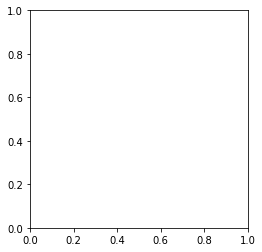

In [17]:
BasePath = '/Users/bren/Desktop/ME/'
InputFileName = '0121.pdf'
OutputFileName = '0121_OUT_2.pdf'


# Convert each page into a png file (stored in a uniquely named folder)
images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

# Process each png image 1 by 1 using OpenCV Operations
for image in images:
       
    #image = cv2.imread(img,cv2.IMREAD_GRAYSCALE) #imread(img,0) to load in grayscale
    
    img = np.asarray(image)
    plt.imshow(img)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    plt.figure(figsize=(20,20))
    plt.imshow(img_hsv)
    
    # another Operation
    oi2 = OTSUBinarization(image)
    #showImage(oi2.image)
    
    cv2.imwrite(img,oi2.image)
    
    
# Recombine all modifed png files into a single multi-page pdf
convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

#display the pdf
try:
    WImage(filename=BasePath+OutputFileName)
except Exception as e:
    print(e)


ValueError: Colormap 199.0 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

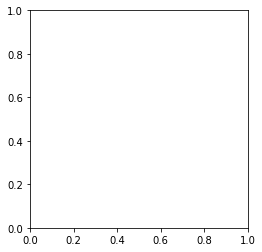

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import re
import json


img_rgb = cv2.imread('/Users/bren/Desktop/ME/IMGS_20191015102635/1_out.png')

Conv_hsv_Gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

img_rgb[mask == 255] = [0, 0, 255]

cv2.imshow("imgOriginal", img_rgb)  # show windows
plt.show()

plt.imshow("output", ret)  # show windows
plt.show()

#cv2.imshow("mask", mask)  # show windows


cv2.waitKey(0)